In [3]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=7035fc57650d0c0cf35d6fa0c8de848ee518237434013b4c1c54fd4ad259f1b1
  Stored in directory: c:\users\sherm\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the timelibrary and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jakar
Processing Record 2 of Set 1 | necochea
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | wilmington
Processing Record 5 of Set 1 | seymchan
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | henties bay
Processing Record 8 of Set 1 | corralillo
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | tres arroyos
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | paso de carrasco
Processing Record 13 of Set 1 | keetmanshoop
Processing Record 14 of Set 1 | el refugio
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | broken hill
Processing Record 18 of Set 1 | los llanos de aridane
Processing Record 19 of Set 1 | umm lajj
Processing Record 20 of Set 1 | egvekinot
Processing Record 21 of Set 1 | qaanaaq
Processing Record 2

Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | mosquera
Processing Record 42 of Set 4 | oxapampa
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | sungai siput utara
City not found. Skipping...
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | gadung
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | san luis
Processing Record 49 of Set 4 | ampanihy
Processing Record 50 of Set 4 | tual
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | sao joao da barra
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | nadym
Processing Record 7 of Set 5 | farafangana
Processing Record 8 of Set 5 | fortuna foothills
Processing Record 9 of Set 5 | fairbanks
Processing Record 10 of Set 5 | kharp
Process

Processing Record 28 of Set 8 | matara
Processing Record 29 of Set 8 | el alto
Processing Record 30 of Set 8 | tevaitoa
Processing Record 31 of Set 8 | pacific grove
Processing Record 32 of Set 8 | presidencia roque saenz pena
Processing Record 33 of Set 8 | talcahuano
Processing Record 34 of Set 8 | itupiranga
Processing Record 35 of Set 8 | tungkang
City not found. Skipping...
Processing Record 36 of Set 8 | nalut
Processing Record 37 of Set 8 | taksimo
Processing Record 38 of Set 8 | boali
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | nehe
Processing Record 41 of Set 8 | barceloneta
Processing Record 42 of Set 8 | asau
Processing Record 43 of Set 8 | nizhniy kuranakh
Processing Record 44 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 45 of Set 8 | la rioja
Processing Record 46 of Set 8 | at-bashi
Processing Record 47 of Set 8 | isangel
Processing Record 48 of Set 8 | bolshaya murta
City not found. Skipping...
Processing Record 49 of S

Processing Record 18 of Set 12 | verkhnedneprovskiy
Processing Record 19 of Set 12 | kiunga
Processing Record 20 of Set 12 | lewiston
Processing Record 21 of Set 12 | mayumba
Processing Record 22 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 12 | yeppoon
Processing Record 24 of Set 12 | mocambique
City not found. Skipping...
Processing Record 25 of Set 12 | nouakchott
Processing Record 26 of Set 12 | safaga
Processing Record 27 of Set 12 | kapit
Processing Record 28 of Set 12 | neiafu
Processing Record 29 of Set 12 | polyany
Processing Record 30 of Set 12 | tuy hoa
Processing Record 31 of Set 12 | swan river
Processing Record 32 of Set 12 | catio
Processing Record 33 of Set 12 | rafraf
Processing Record 34 of Set 12 | san quintin
Processing Record 35 of Set 12 | ankazoabo
Processing Record 36 of Set 12 | kaitangata
Processing Record 37 of Set 12 | saint-joseph
Processing Record 38 of Set 12 | ures
Processing Record 39 of Set 12 | lompoc
Processing Record 4

In [12]:
# Tallying number of cities in the city_data array of dictionaries.
len(city_data)

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jakar,27.5492,90.7525,58.06,99,100,1.77,BT,2022-06-07 20:42:08
1,Necochea,-38.5473,-58.7368,57.11,56,88,12.24,AR,2022-06-07 20:42:08
2,Busselton,-33.6500,115.3333,56.86,54,100,18.48,AU,2022-06-07 20:42:09
3,Wilmington,34.2257,-77.9447,85.91,68,40,11.50,US,2022-06-07 20:41:07
4,Seymchan,62.8833,152.4333,49.96,42,39,9.48,RU,2022-06-07 20:42:09
5,Avarua,-21.2078,-159.7750,78.85,73,40,10.36,CK,2022-06-07 20:42:10
6,Henties Bay,-22.1160,14.2845,70.86,38,0,7.85,NA,2022-06-07 20:42:12
7,Corralillo,22.9819,-80.5856,77.90,87,100,9.33,CU,2022-06-07 20:42:12
8,Cape Town,-33.9258,18.4232,67.37,61,0,1.14,ZA,2022-06-07 20:42:13
9,Tres Arroyos,-38.3739,-60.2798,58.03,49,100,13.33,AR,2022-06-07 20:42:14


In [14]:
# Reordering the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jakar,BT,2022-06-07 20:42:08,27.5492,90.7525,58.06,99,100,1.77
1,Necochea,AR,2022-06-07 20:42:08,-38.5473,-58.7368,57.11,56,88,12.24
2,Busselton,AU,2022-06-07 20:42:09,-33.6500,115.3333,56.86,54,100,18.48
3,Wilmington,US,2022-06-07 20:41:07,34.2257,-77.9447,85.91,68,40,11.50
4,Seymchan,RU,2022-06-07 20:42:09,62.8833,152.4333,49.96,42,39,9.48
5,Avarua,CK,2022-06-07 20:42:10,-21.2078,-159.7750,78.85,73,40,10.36
6,Henties Bay,NA,2022-06-07 20:42:12,-22.1160,14.2845,70.86,38,0,7.85
7,Corralillo,CU,2022-06-07 20:42:12,22.9819,-80.5856,77.90,87,100,9.33
8,Cape Town,ZA,2022-06-07 20:42:13,-33.9258,18.4232,67.37,61,0,1.14
9,Tres Arroyos,AR,2022-06-07 20:42:14,-38.3739,-60.2798,58.03,49,100,13.33


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

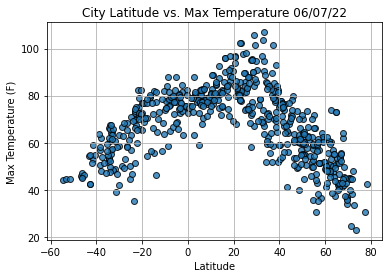

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

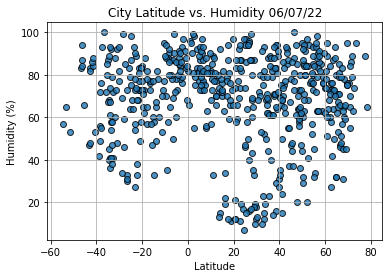

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


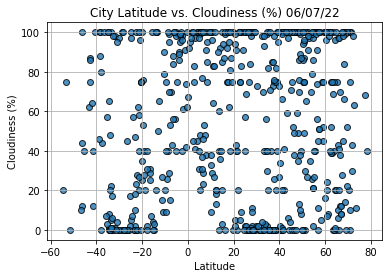

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

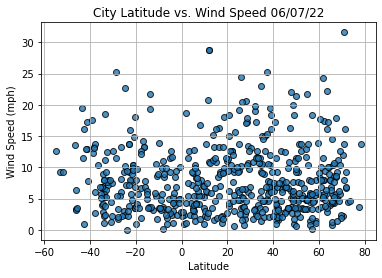

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [32]:
index13 = city_data_df.loc[13]
index13

City                   El Refugio
Country                        MX
Date          2022-06-07 20:42:15
Lat                       20.6667
Lng                     -103.7333
Max Temp                    93.96
Humidity                       21
Cloudiness                      5
Wind Speed                    3.8
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
566     True
567     True
568    False
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [34]:
# Returns a DataFrame fitting the criteria:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jakar,BT,2022-06-07 20:42:08,27.5492,90.7525,58.06,99,100,1.77
3,Wilmington,US,2022-06-07 20:41:07,34.2257,-77.9447,85.91,68,40,11.50
4,Seymchan,RU,2022-06-07 20:42:09,62.8833,152.4333,49.96,42,39,9.48
7,Corralillo,CU,2022-06-07 20:42:12,22.9819,-80.5856,77.90,87,100,9.33
13,El Refugio,MX,2022-06-07 20:42:15,20.6667,-103.7333,93.96,21,5,3.80


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

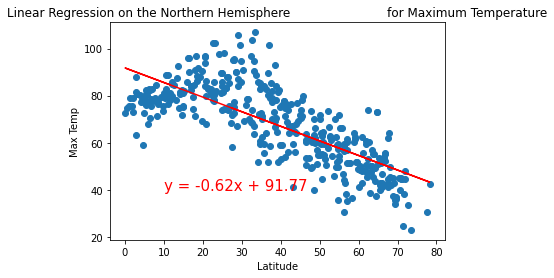

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

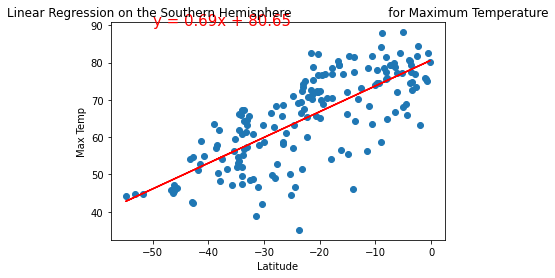

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

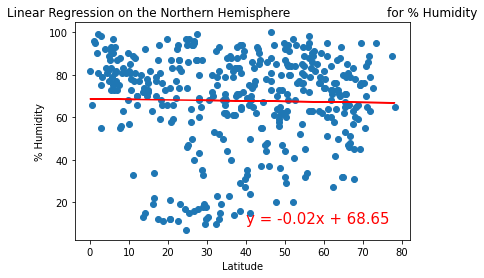

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

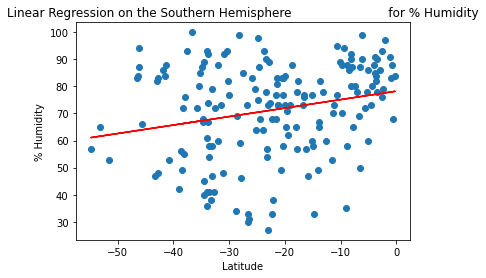

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

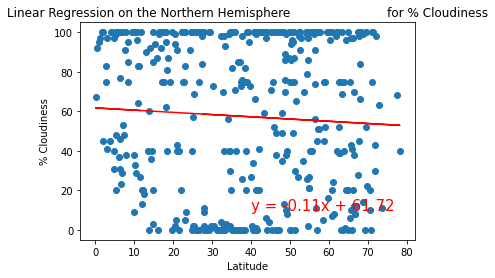

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

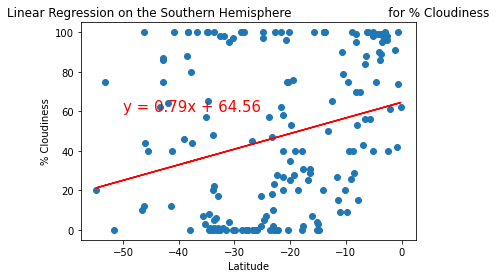

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

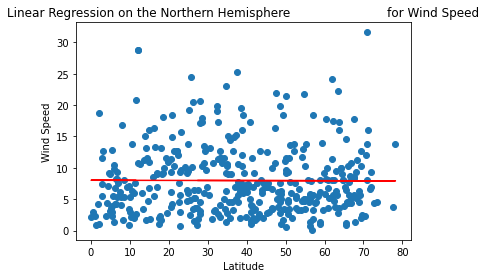

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

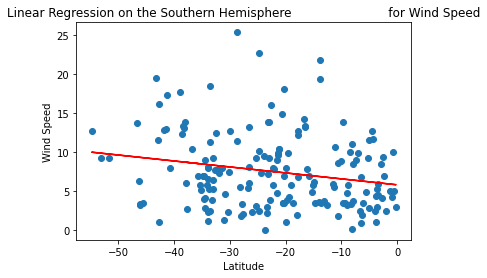

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))